In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

In [3]:
IMAGE_SIZE = [128, 128, 3]
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [6]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
train_path = 'C:/Users/admin/Documents/Material/BTECH PROJECT/Trash/CustomData/Customtrain'
valid_path = 'C:/Users/admin/Documents/Material/BTECH PROJECT/Trash/CustomData/Customval'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(valid_path,
                                         target_size = (128, 128),
                                         batch_size = 16,
                                         class_mode = 'categorical')

Found 3648 images belonging to 2 classes.
Found 1041 images belonging to 2 classes.


In [8]:
model_details=model.fit(training_set,batch_size=16, epochs = 30, validation_data=val_set, verbose = 2,steps_per_epoch=len(training_set),validation_steps=len(val_set))

Epoch 1/30
228/228 - 589s - loss: 0.3225 - accuracy: 0.8602 - val_loss: 0.1976 - val_accuracy: 0.9270
Epoch 2/30
228/228 - 451s - loss: 0.2077 - accuracy: 0.9183 - val_loss: 0.1709 - val_accuracy: 0.9308
Epoch 3/30
228/228 - 426s - loss: 0.1738 - accuracy: 0.9309 - val_loss: 0.1737 - val_accuracy: 0.9270
Epoch 4/30
228/228 - 331s - loss: 0.1664 - accuracy: 0.9331 - val_loss: 0.1471 - val_accuracy: 0.9462
Epoch 5/30
228/228 - 256s - loss: 0.1482 - accuracy: 0.9430 - val_loss: 0.1624 - val_accuracy: 0.9280
Epoch 6/30
228/228 - 249s - loss: 0.1272 - accuracy: 0.9509 - val_loss: 0.1439 - val_accuracy: 0.9462
Epoch 7/30
228/228 - 259s - loss: 0.1259 - accuracy: 0.9523 - val_loss: 0.1479 - val_accuracy: 0.9395
Epoch 8/30
228/228 - 272s - loss: 0.1200 - accuracy: 0.9534 - val_loss: 0.1646 - val_accuracy: 0.9347
Epoch 9/30
228/228 - 257s - loss: 0.1256 - accuracy: 0.9507 - val_loss: 0.1710 - val_accuracy: 0.9433
Epoch 10/30
228/228 - 441s - loss: 0.1072 - accuracy: 0.9581 - val_loss: 0.2073 - 

In [9]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [10]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

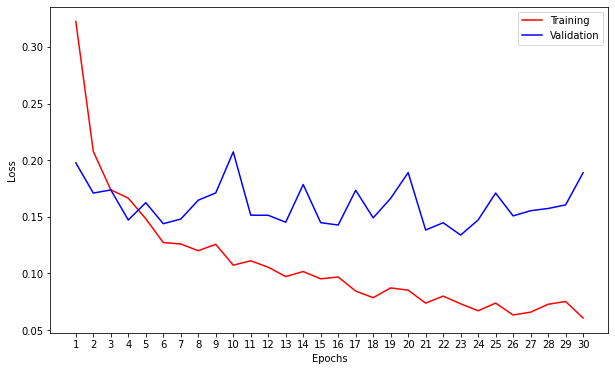

In [12]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

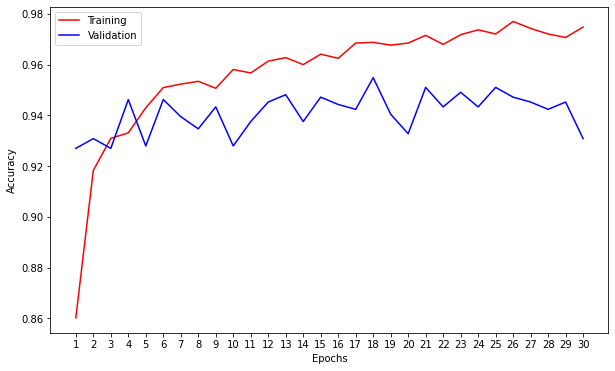

In [13]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [20]:
from IPython.display import Image
from keras.preprocessing import image
import tensorflow
img_path = 'C:/Users/Arpit/Desktop/Project/Datasets/Custom/test/garbage-queried-images/img26.jpg'
test_image = image.load_img(img_path, target_size = [128,128])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0]>result[0][1]:
    print("Garbage")
else:
    print("Non-Garbage")

Garbage
